# Data Cleaning & Labelling
-------------------
### Workflow:
##### 1. import and resample HR data
##### 2. apply moving average filter to HR
##### 3. import EDA data and apply moving average filter
##### 4. apply anxiety labels
##### 5. combine data
##### 6. remove some data to add balance
##### 7. plot data to check anxiety labels look appropriate by eye

---------------------

##### 0. import packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

##### 1. import HR and resample

In [3]:
#Import HR and resample

hr_1 = pd.read_csv("HR.csv")
hr_1.index = pd.date_range('2019-12-10', periods = len(hr_1), freq='1S')

hr_resamp_1 = hr_1.resample('0.25S').ffill()
display(hr_resamp_1.describe())
display(hr_resamp_1.head(10))
hr_resamp_1.to_csv("HRresample.csv")

,1575967321.000000
count,193337.00000
mean,92.48293
std,14.47518
min,1.00000
25%,81.70000
50%,91.08000
75%,102.18000
max,135.83000


,1575967321.000000
2019-12-10 00:00:00.000,1.0
2019-12-10 00:00:00.250,1.0
2019-12-10 00:00:00.500,1.0
2019-12-10 00:00:00.750,1.0
2019-12-10 00:00:01.000,48.0
2019-12-10 00:00:01.250,48.0
2019-12-10 00:00:01.500,48.0
2019-12-10 00:00:01.750,48.0
2019-12-10 00:00:02.000,63.5
2019-12-10 00:00:02.250,63.5


##### 2. Apply moving average filter to HR

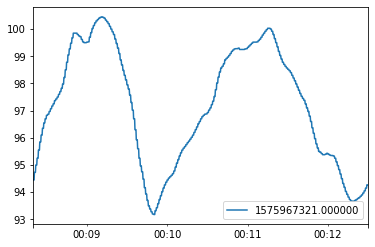

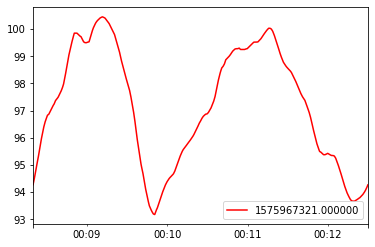

In [4]:
#Moving average filter

rolling = hr_resamp_1.rolling(window=4)
hr_filtered = rolling.mean()

#Examples of smoothing using moving average filter

Hr = hr_resamp_1[2000:3000].plot()
Aver = hr_filtered[2000:3000].plot(color='red')
pyplot.show()

##### 3. Import EDA data and apply moving average filter

,1575967311,Labelled
2019-12-10 00:00:00.000,4.000000,0
2019-12-10 00:00:00.250,0.000000,0
2019-12-10 00:00:00.500,0.043568,0
2019-12-10 00:00:00.750,0.085854,0
2019-12-10 00:00:01.000,0.083292,0


,1575967311,Labelled
count,193375.000000,193375.000000
mean,0.317914,0.000005
std,0.127932,0.002274
min,0.000000,0.000000
25%,0.219121,0.000000
50%,0.278066,0.000000
75%,0.398518,0.000000
max,4.000000,1.000000


0    193374
1         1
Name: Labelled, dtype: int64

65998


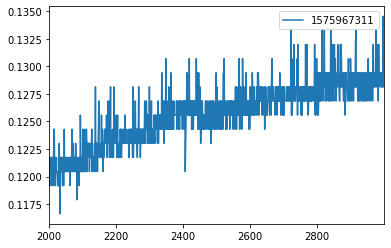

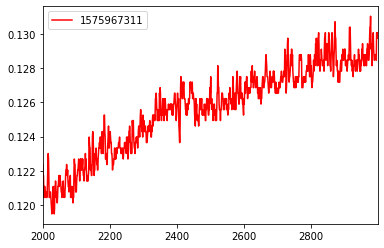

In [5]:
#Import EDA and stress label 

eda_1 = pd.read_csv(("EDALabelled.csv"))
eda_1.index = pd.date_range('2019-12-10', periods = len(eda_1), freq='0.25S')
display(eda_1.head(5))
display(eda_1.describe())
display(eda_1['Labelled'].value_counts())

#Find initial anxiety label (first anxiety occurrence was prelabelled)
anxiety_start = np.where(eda_1['Labelled'] == 1)
start_anxiety = anxiety_start[0][0] #stress at 1:22
print(start_anxiety)

#Moving average filter
eda_2 = pd.read_csv(("EDA.csv"))
rolling = eda_2.rolling(window=4)
eda_filtered = rolling.mean()

#Examples of smoothing using moving average filter
eda_2[2000:3000].plot()
eda_filtered[2000:3000].plot(color='red')
eda_filtered.index = pd.date_range('2019-12-10', periods = len(eda_1), freq='0.25S')
pyplot.show()

##### 4. Apply anxiety labels

In [6]:
#Assigning anxiety labels - start value prelabelled and duration of anxiety precalculated

anxietyduration1 = 86400
counter = 1

while counter < anxietyduration1:
        counter = counter + 1
        eda_1['Labelled'][start_anxiety] = 1
        start_anxiety = start_anxiety + 1
    
display(eda_1['Labelled'].value_counts()) 

C:\Users\Ruksana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0    106976
1     86399
Name: Labelled, dtype: int64

##### 5. Combine data

In [46]:
#Combine data

dfstress = pd.concat([hr_filtered,eda_filtered, eda_1], ignore_index=True , axis = 1 )
display(dfstress.head(10))
display(dfstress.describe())
dfstress = dfstress.drop(2, axis =1)
dfstress = dfstress.T.reset_index(drop=True).T
display(dfstress.describe())
display(dfstress.head(10))

,0,1,2,3
2019-12-10 00:00:00.000,NaN,NaN,4.000000,0
2019-12-10 00:00:00.250,NaN,NaN,0.000000,0
2019-12-10 00:00:00.500,NaN,NaN,0.043568,0
2019-12-10 00:00:00.750,1.000,1.032355,0.085854,0
2019-12-10 00:00:01.000,12.750,0.053179,0.083292,0
2019-12-10 00:00:01.250,24.500,0.074322,0.084573,0
2019-12-10 00:00:01.500,36.250,0.085214,0.087136,0
2019-12-10 00:00:01.750,48.000,0.085214,0.085854,0
2019-12-10 00:00:02.000,51.875,0.085854,0.085854,0
2019-12-10 00:00:02.250,55.750,0.086495,0.087136,0


,0,1,2,3
count,193334.000000,193372.000000,193375.000000,193375.000000
mean,92.483576,0.317894,0.317914,0.446795
std,14.472142,0.127619,0.127932,0.497162
min,1.000000,0.053179,0.000000,0.000000
25%,81.700000,0.218800,0.219121,0.000000
50%,91.090000,0.277745,0.278066,0.000000
75%,102.186875,0.398838,0.398518,1.000000
max,135.830000,1.032355,4.000000,1.000000


,0,1,2
count,193334.000000,193372.000000,193375.000000
mean,92.483576,0.317894,0.446795
std,14.472142,0.127619,0.497162
min,1.000000,0.053179,0.000000
25%,81.700000,0.218800,0.000000
50%,91.090000,0.277745,0.000000
75%,102.186875,0.398838,1.000000
max,135.830000,1.032355,1.000000


,0,1,2
2019-12-10 00:00:00.000,NaN,NaN,0.0
2019-12-10 00:00:00.250,NaN,NaN,0.0
2019-12-10 00:00:00.500,NaN,NaN,0.0
2019-12-10 00:00:00.750,1.000,1.032355,0.0
2019-12-10 00:00:01.000,12.750,0.053179,0.0
2019-12-10 00:00:01.250,24.500,0.074322,0.0
2019-12-10 00:00:01.500,36.250,0.085214,0.0
2019-12-10 00:00:01.750,48.000,0.085214,0.0
2019-12-10 00:00:02.000,51.875,0.085854,0.0
2019-12-10 00:00:02.250,55.750,0.086495,0.0


##### 6. Remove some data to add balance

In [47]:
#Remove some non-anxious data to add balance

dfstress = dfstress.drop(dfstress.index[:10])
dfstress = dfstress[:-24690]
display(dfstress.describe())
display(dfstress[2].value_counts())

dfstress.to_csv("combined_data_cleaned_1.csv")

,0,1,2
count,168675.000000,168675.000000,168675.000000
mean,92.900700,0.331854,0.512222
std,14.823529,0.130645,0.499852
min,55.320000,0.085854,0.000000
25%,81.630000,0.229052,0.000000
50%,91.275000,0.342456,1.000000
75%,103.037500,0.414535,1.000000
max,135.830000,0.800000,1.000000


1.0    86399
0.0    82276
Name: 2, dtype: int64

##### 7. Plot data to check anxiety labels look appropriate by eye

Text(0, 0.5, ' stress labels')

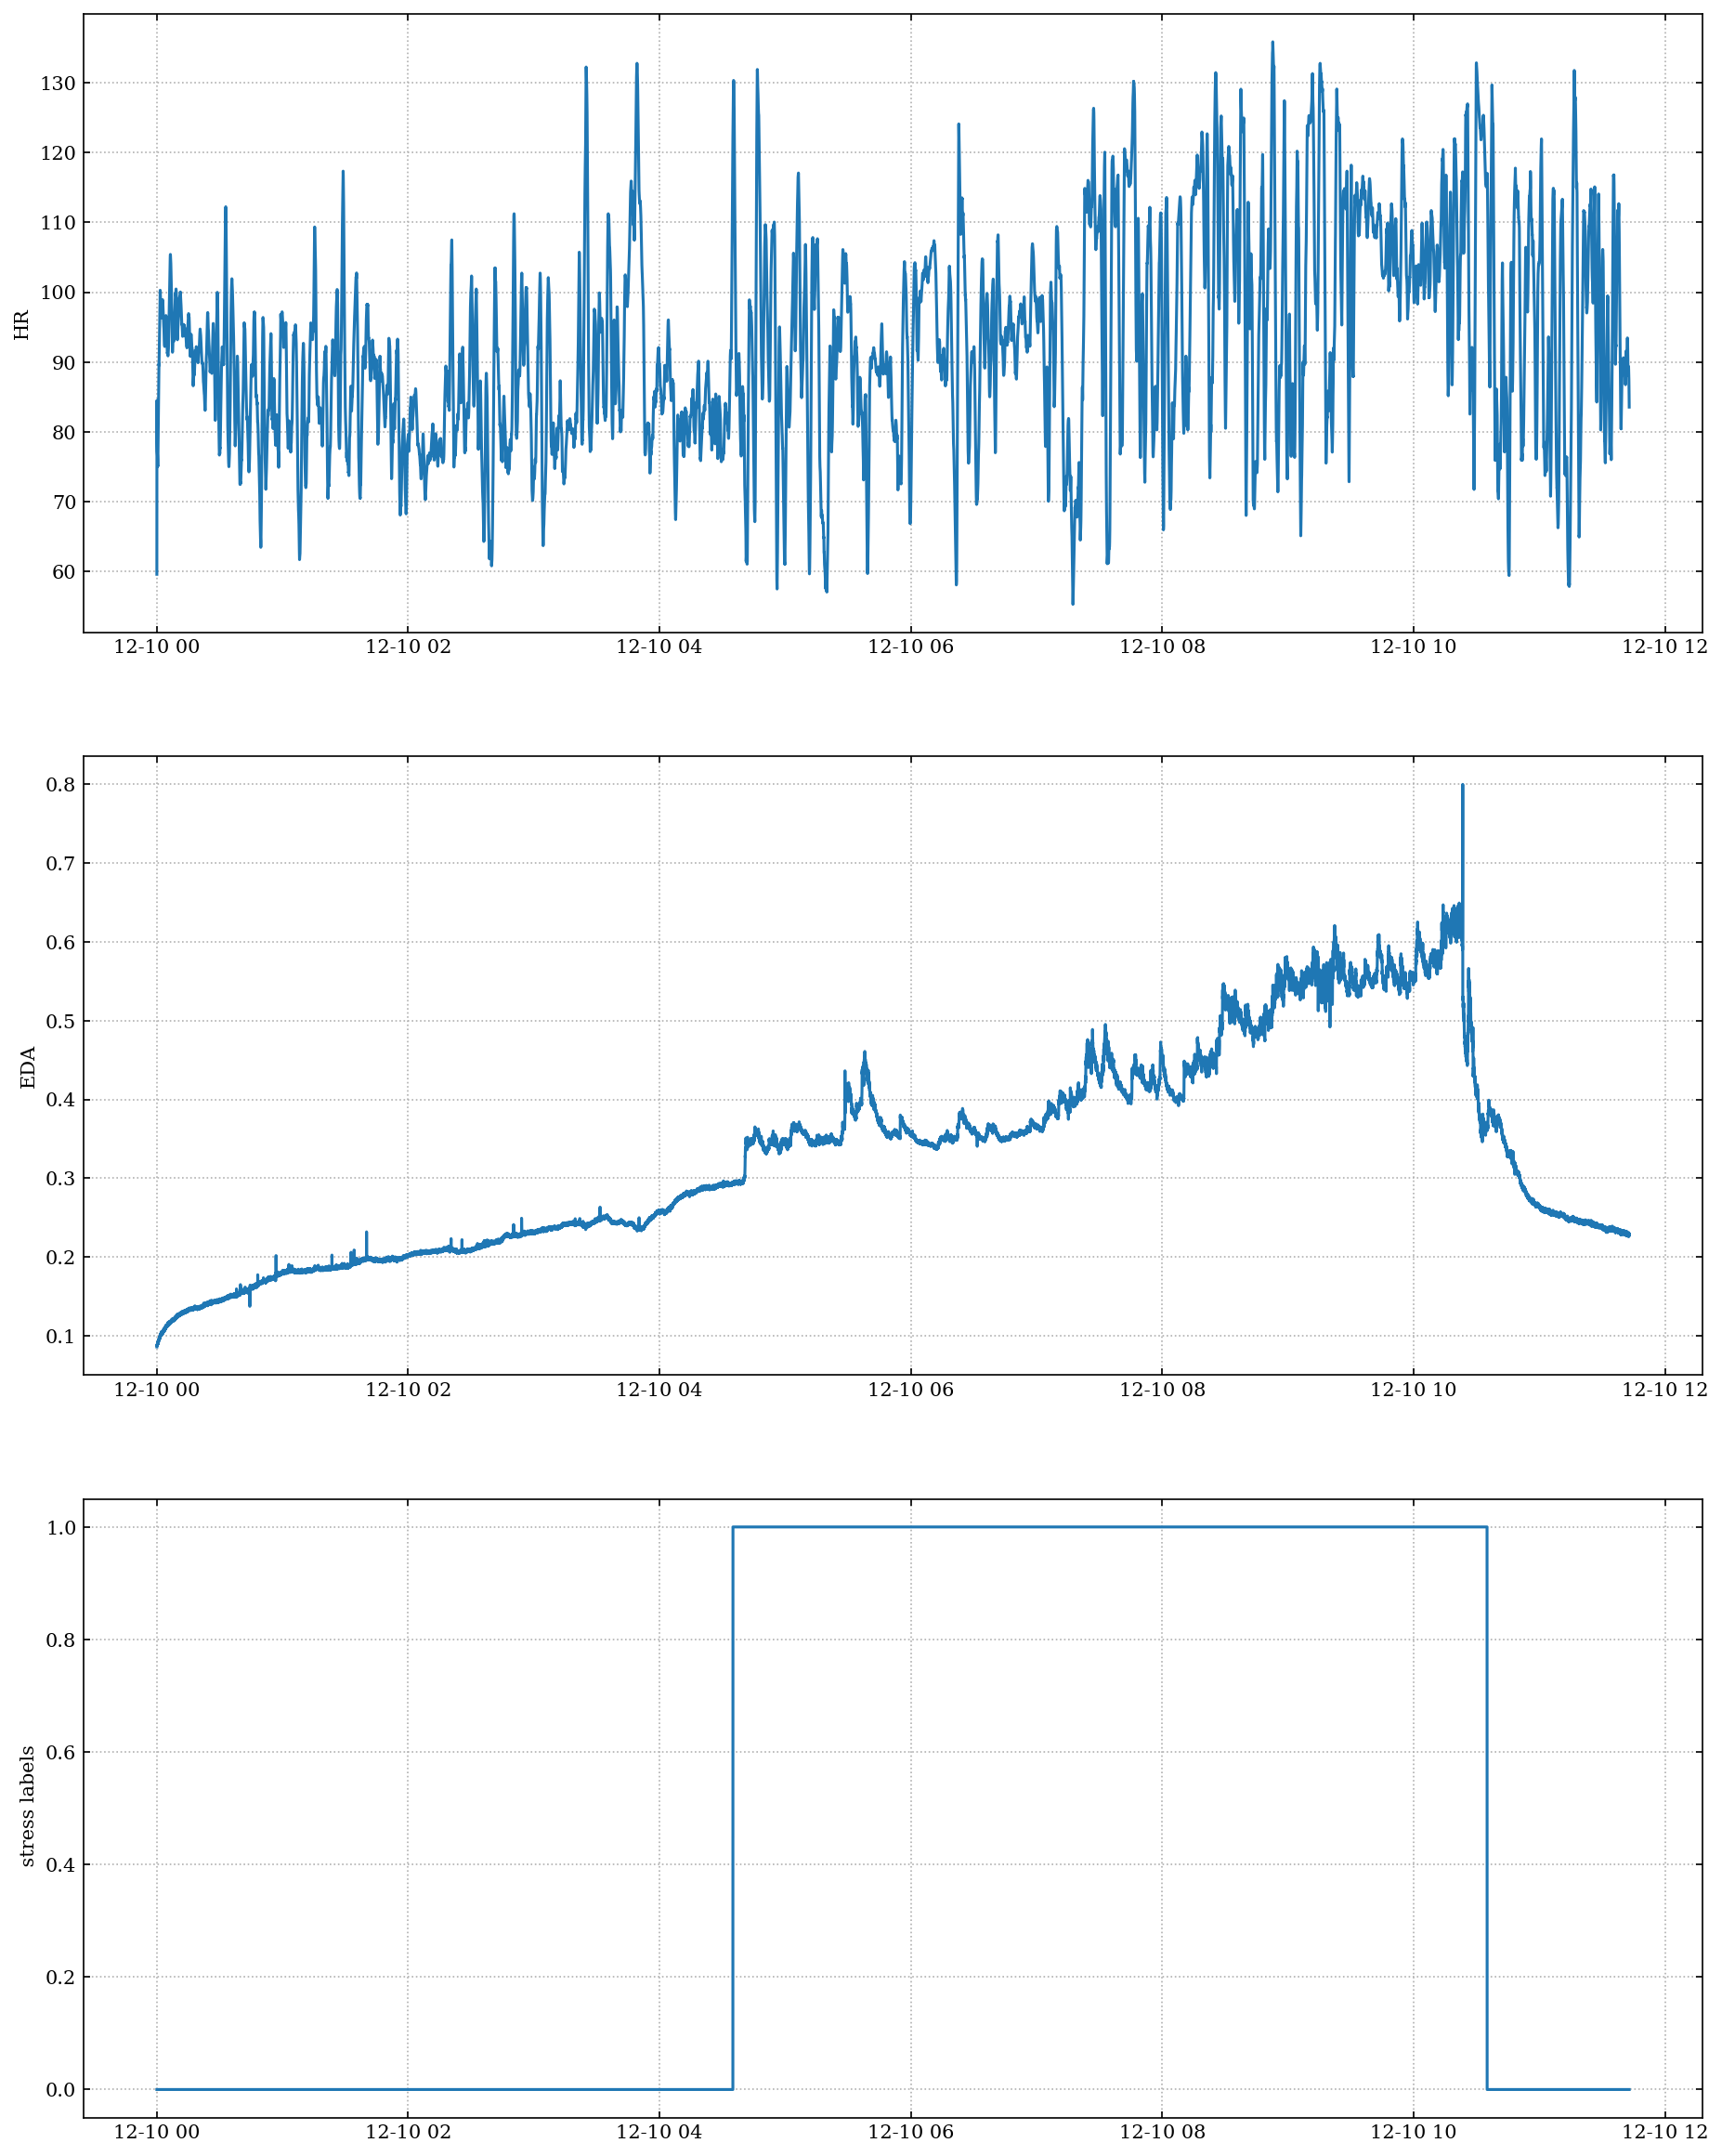

In [48]:
#Plot to check if labels look appropriate by inspection

plt.rcParams["font.family"] = "serif"
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 150
plt.rcParams['figure.figsize'] = 20, 10

def newfigure(*args, **kwargs):
    fig, ax = plt.subplots(*args, **kwargs)
    for i, a in enumerate(fig.axes):
        a.tick_params(direction='in', grid_linestyle=":", top=True, right=True)
        a.grid(which='major', axis='both', linestyle=":")
    return fig, ax

fig, ax = newfigure(3, figsize=(15,20))

ax[0].plot(dfstress[0])
ax[0].set_ylabel("HR")
ax[1].plot(dfstress[1])
ax[1].set_ylabel("EDA")
ax[2].plot(dfstress[2])
ax[2].set_ylabel(" stress labels")

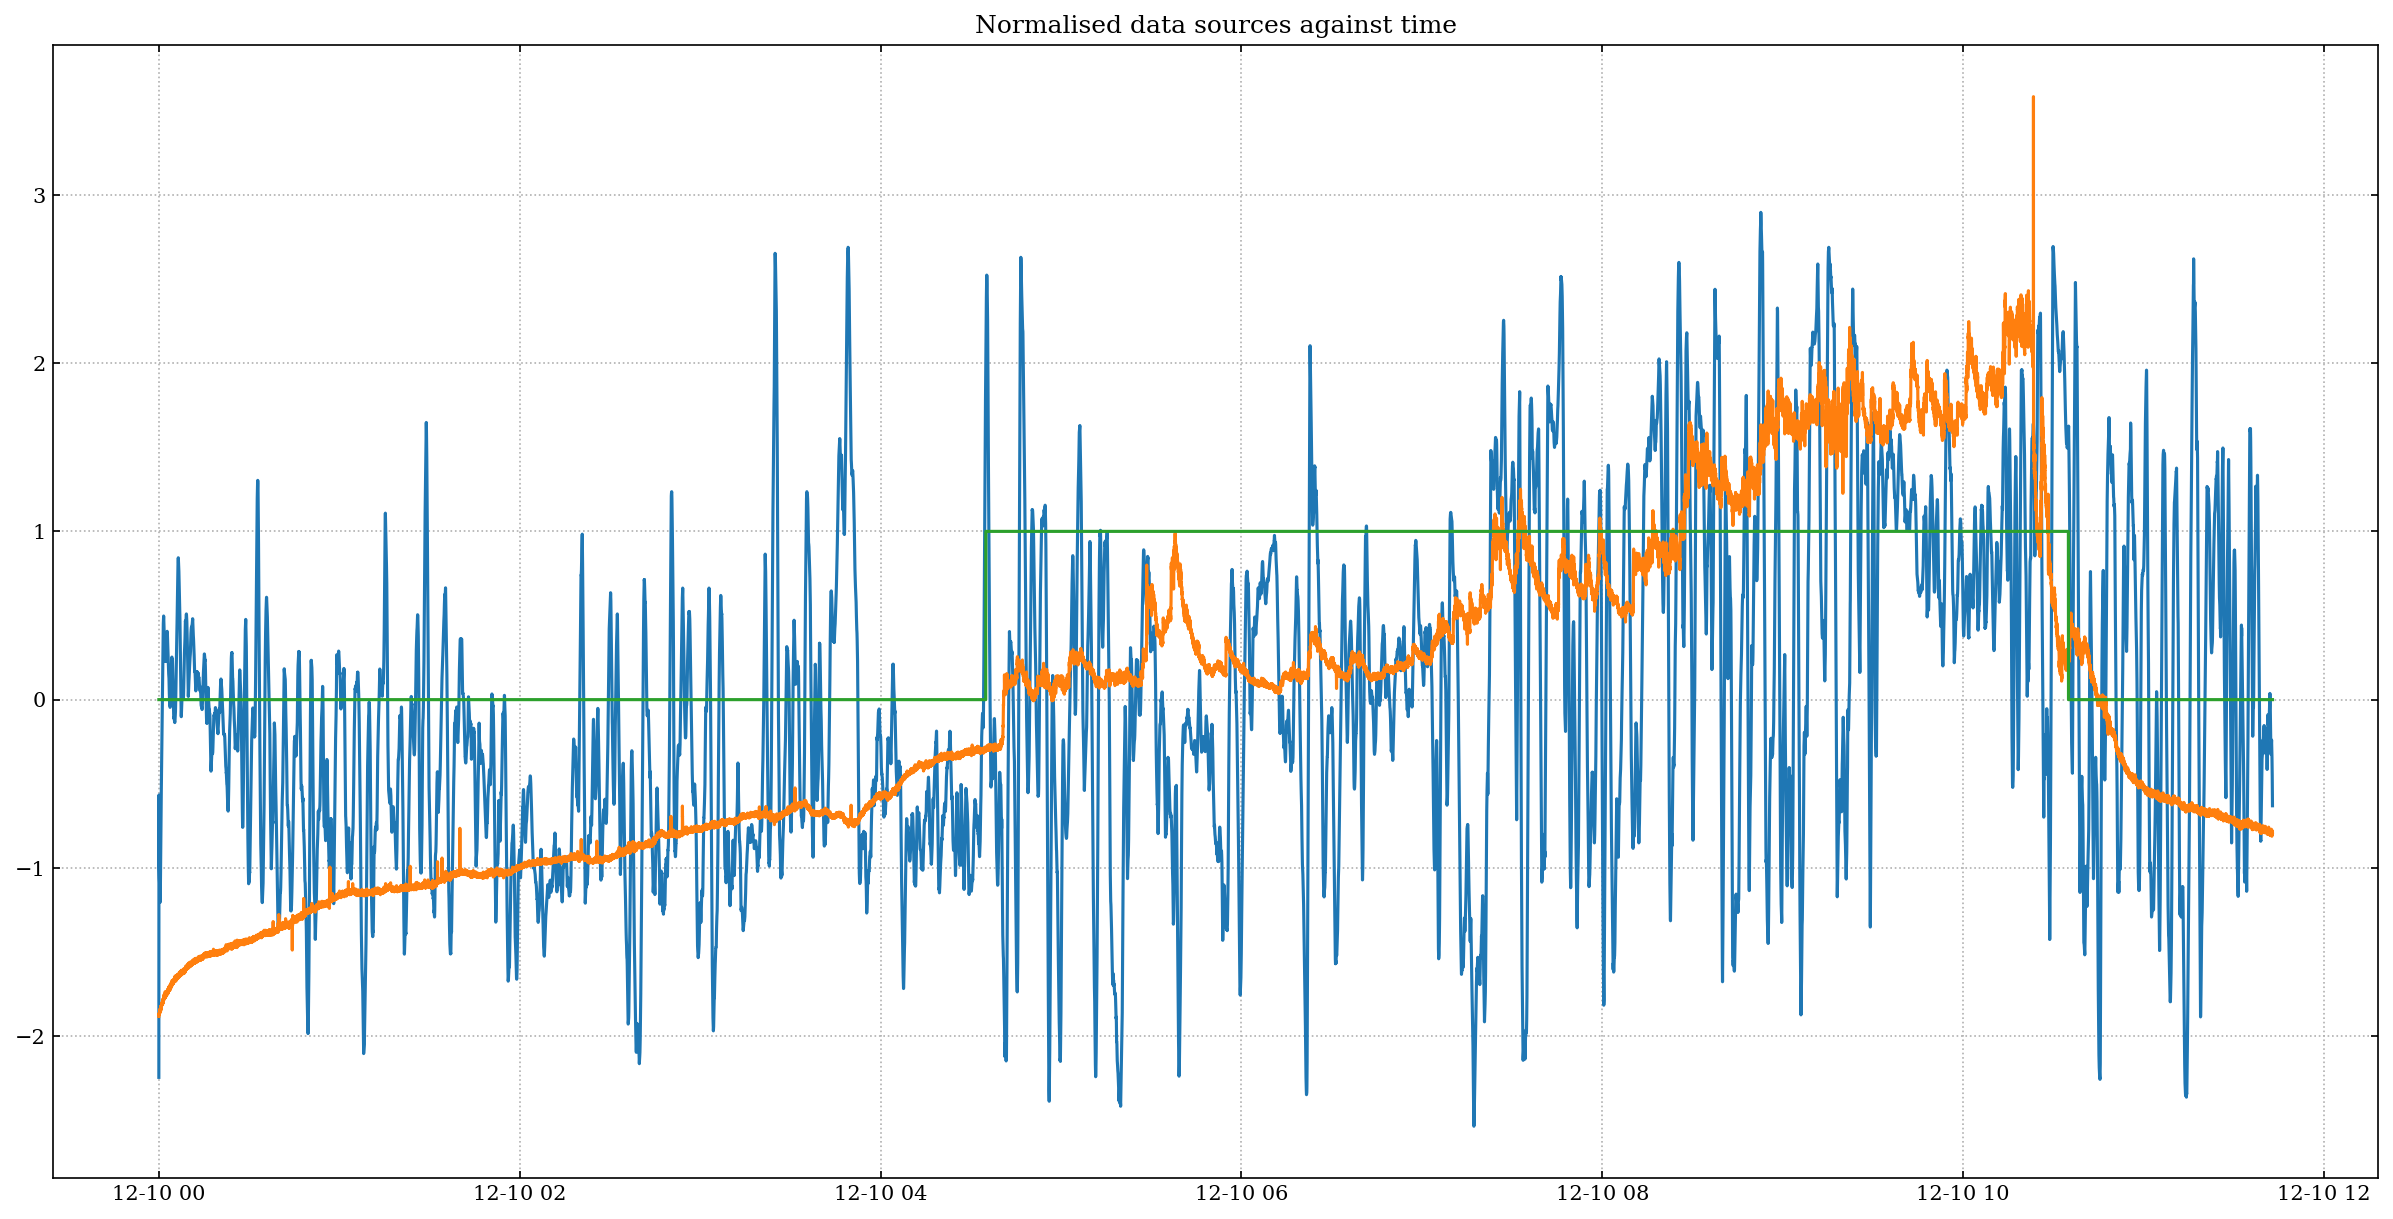

In [49]:
# create new dataframes to store normalised data

ndata = dfstress.copy(deep=True)

stats = {}

for name in ndata.columns.values:
    mean = np.mean(ndata[name])
    stdv = np.std(ndata[name])
    ndata[name] = (ndata[name] - mean) / stdv
    
ndata.to_csv("norm_data.csv")  

fig, axs = newfigure()

axs.plot(ndata[0])
axs.plot(ndata[1])
axs.plot(dfstress[2])
axs.set_title("Normalised data sources against time")
plt.show()